# C-O Yukawa Binary Mixture

In this notebook we will calculate the diffusion and interdiffusion coefficients of Binary Ionic Mixture (BIM) of Hydrogen and Helium. This notebook tries to reproduce the data obtained from Hansen, Joly, and McDonald's [paper](https://doi.org/10.1016/0378-4371(85)90022-6).

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/BIM/input_files/BIM_cgs.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/BIM/H-He_Mixture.ipynb).

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import PreProcess, Simulation, PostProcess


# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'ybim_mks_pp.yaml')

In [2]:
# sim = PreProcess(input_file_name)
# sim.setup(read_yaml=True)
# sim.run()

In [3]:
# sim = Simulation(input_file_name)
# sim.setup(read_yaml=True)
# sim.run()

In [4]:
postproc = PostProcess(input_file_name, grab_last_step=True)
postproc.setup(read_yaml=True, )

In [5]:
from sarkas.tools.observables import Thermodynamics, RadialDistributionFunction, DiffusionFlux



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/CO_mks_pp/PostProcessing/Thermodynamics/Production/Thermodynamics_CO_mks_pp.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 40001
Total time per block: T = 2.1484e-12 [s] ~ 1191 plasma periods
Time interval: dt = 5.3709e-17 [s] ~ 3.0e-02 plasma period



Thermodynamics calculation Time: 0 sec 59 msec 654 usec 0 nsec


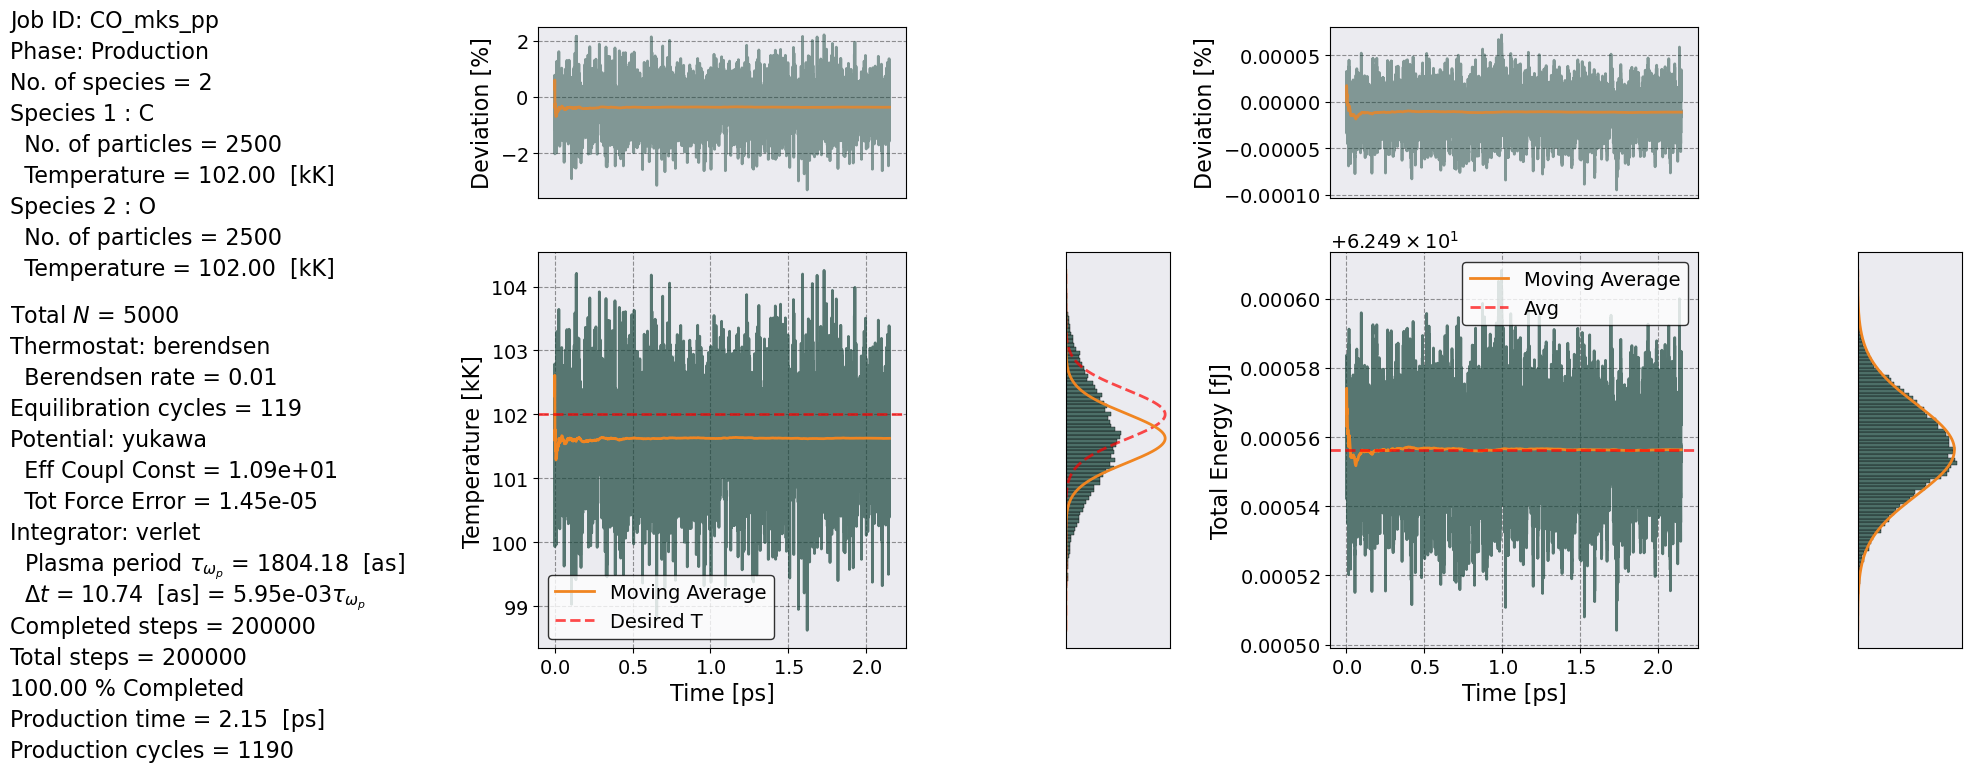

In [7]:
therm = Thermodynamics()
therm.setup(postproc.parameters, phase = 'production')
therm.compute()
therm.temp_energy_plot(postproc,)



==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/CO_mks_pp/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_CO_mks_pp.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 250
dr = 0.0240 a_ws = 1.1817e-12 [m]
Maximum Distance (i.e. potential.rc)= 6.0000 a_ws = 2.9542e-10 [m]
Time Series Data:
No. of blocks = 1
No. dumps per block = 40001
Total time per block: T = 2.1484e-12 [s] ~ 1191 plasma periods
Time interval: dt = 5.3709e-17 [s] ~ 3.0e-02 plasma period


Calculating RDF for slice:   0%|          | 0/1 [00:00<?, ?it/s]


Radial Distribution Function Calculation Time: 0 sec 31 msec 743 usec 792 nsec


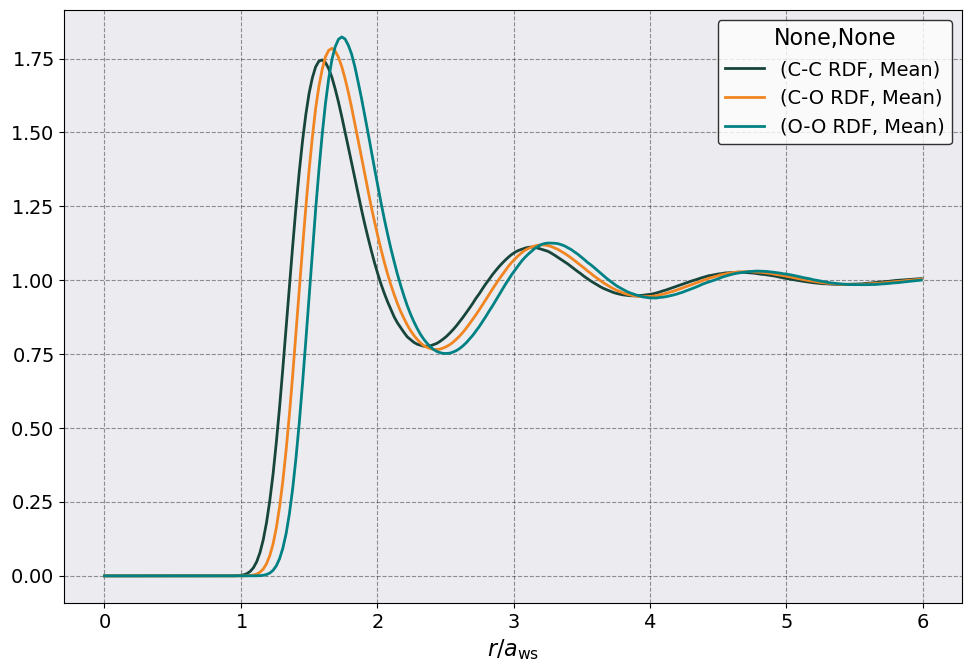

In [8]:
rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters, phase = 'production')
rdf.compute()
ax = rdf.plot(scaling = rdf.a_ws, 
              y = [("C-C RDF", "Mean"), ("C-O RDF", "Mean"), ("O-O RDF", "Mean")],
              xlabel = r'$r/a_{\rm ws}$',
)


In [39]:
diff = DiffusionFlux()
diff.setup(postproc.parameters, phase = 'production')
diff.compute(calculate_acf=True)



=========================== Diffusion Flux ===========================
Data saved in: 
 SarkasSimulations/CO_mks_pp/PostProcessing/DiffusionFlux/Production/DiffusionFlux_CO_mks_pp.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 40001
Total time per block: T = 2.1484e-12 [s] ~ 1191 plasma periods
Time interval: dt = 5.3709e-17 [s] ~ 3.0e-02 plasma period

Data file not found! 
 SarkasSimulations/CO_mks_pp/PostProcessing/DiffusionFlux/Production/DiffusionFlux_CO_mks_pp_raw.h5


KeyError: "Unable to synchronously open object (object 'species_diffusion_flux' doesn't exist)"

In [40]:
with h5py.File(diff.h5md_filepath) as f:
    observables_group = f['observables']
    print(observables_group.keys())

<KeysViewHDF5 ['C', 'O', 'rdf_hist']>


In [44]:
diff.species_concentrations.T @ diff.species_temperature

102000.0